<a href="https://colab.research.google.com/github/jgesc-05/clase-inteligencia-artificial/blob/main/Cuaderno_5_Creaci%C3%B3n_de_Nuevas_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Cuaderno 5: Creación de Nuevas Características
La creación de nuevas características (feature engineering) es un paso crucial en el preprocesamiento de datos, ya que puede mejorar la capacidad predictiva de los modelos al transformar y combinar los datos originales. En este Sesion, exploraremos estrategias para crear características basadas en datos existentes y ejemplos prácticos para cada caso.


---

## <font color="red">5.1 Combinación y Transformación de Características Existentes
La combinación de características implica usar variables existentes para generar nuevas que reflejen relaciones entre ellas.
### Ejemplo: Crear una relación entre dos columnas


In [1]:
import pandas as pd

# Dataset de ejemplo
data = pd.DataFrame({
    "Precio": [100, 200, 150, 300],
    "Cantidad": [2, 5, 3, 8]
})

# Crear una nueva característica: Total
data["Total"] = data["Precio"] * data["Cantidad"]
print("Datos con nueva característica:\n", data)


Datos con nueva característica:
    Precio  Cantidad  Total
0     100         2    200
1     200         5   1000
2     150         3    450
3     300         8   2400


## <font color="red">5.2 Generación de Características Temporales
Los datos con marcas de tiempo pueden enriquecerse extrayendo información útil como año, mes, día, hora o día de la semana.
### Ejemplo: Procesamiento de características temporales


In [2]:
# Agregar fechas al dataset
data["Fecha"] = pd.to_datetime(["2023-01-01", "2023-01-15", "2023-02-10", "2023-03-01"])

# Extraer características temporales
data["Año"] = data["Fecha"].dt.year
data["Mes"] = data["Fecha"].dt.month
data["Día"] = data["Fecha"].dt.day
data["Día_Semana"] = data["Fecha"].dt.day_name()
print("Datos con características temporales:\n", data)


Datos con características temporales:
    Precio  Cantidad  Total      Fecha   Año  Mes  Día Día_Semana
0     100         2    200 2023-01-01  2023    1    1     Sunday
1     200         5   1000 2023-01-15  2023    1   15     Sunday
2     150         3    450 2023-02-10  2023    2   10     Friday
3     300         8   2400 2023-03-01  2023    3    1  Wednesday


## <font color="red">5.3 Extracción de Características a partir de Texto
El procesamiento de texto permite transformar datos no estructurados en representaciones numéricas útiles.
### <font color="blue">5.3.1 Tokenización y Conteo de Palabras
La tokenización divide el texto en palabras o frases, y el conteo de palabras mide la frecuencia de términos en un texto.


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Datos de texto
data_texto = pd.DataFrame({
    "Texto": ["Hola mundo", "Machine learning es increíble", "Python es popular"]
})

# Vectorizador de palabras
vectorizer = CountVectorizer()
matriz_frecuencia = vectorizer.fit_transform(data_texto["Texto"])

# Mostrar el vocabulario y la matriz
print("\nVocabulario:", vectorizer.get_feature_names_out())
print("Matriz de frecuencia:\n", matriz_frecuencia.toarray())



Vocabulario: ['es' 'hola' 'increíble' 'learning' 'machine' 'mundo' 'popular' 'python']
Matriz de frecuencia:
 [[0 1 0 0 0 1 0 0]
 [1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 1]]


In [7]:


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Datos de texto (usando los mismos datos del ejemplo anterior)
data_texto = pd.DataFrame({
    "Texto": ["Hola mundo", "Machine learning es increíble", "Python es popular"]
})

# Vectorizador de palabras
vectorizer = CountVectorizer()
matriz_frecuencia = vectorizer.fit_transform(data_texto["Texto"])

# Obtener nombres de características (palabras)
feature_names = vectorizer.get_feature_names_out()

# Obtener la matriz de frecuencia como un array
frequencies = matriz_frecuencia.toarray()

# Calcular la frecuencia total de cada palabra
total_frequencies = frequencies.sum(axis=0)

# Crear un DataFrame para mostrar los resultados
frequency_df = pd.DataFrame({'Palabra': feature_names, 'Frecuencia_Total': total_frequencies})
frequency_df


,Palabra,Frecuencia_Total
0,es,2
1,hola,1
2,increíble,1
3,learning,1
4,machine,1
5,mundo,1
6,popular,1
7,python,1


## <font color="red">5.4 Extracción de Características Geoespaciales
Los datos geoespaciales pueden enriquecerse mediante cálculos como distancias, regiones o agrupaciones espaciales.
### Ejemplo: Distancia entre coordenadas
Utilizamos la fórmula de Haversine para calcular la distancia entre dos puntos geográficos.


In [8]:
from geopy.distance import geodesic


# Coordenadas de dos ubicaciones
data_geo = pd.DataFrame({
    "Latitud": [19.4326, 40.7128],  # Ciudad de México, Nueva York
    "Longitud": [-99.1332, -74.0060]
})


# Calcular distancias desde un punto de referencia
referencia = (19.4326, -99.1332)  # Ciudad de México
data_geo["Distancia_km"] = data_geo.apply(
    lambda row: geodesic(referencia, (row["Latitud"], row["Longitud"])).kilometers, axis=1
)
print("\nDatos con distancia geoespacial:\n", data_geo)


Datos con distancia geoespacial:
    Latitud  Longitud  Distancia_km
0  19.4326  -99.1332        0.0000
1  40.7128  -74.0060     3357.6952


In [11]:
import pandas as pd
import numpy as np

# Número de estudiantes
n = 100

# Generar edades aleatorias entre 17 y 22
edades = np.random.randint(17, 23, n)

# Definir coordenadas centrales de Bucaramanga
latitud_centro = 7.1256
longitud_centro = -73.1198

# Generar variaciones de latitud y longitud para simular la periferia
variacion_latitud = np.random.normal(0, 0.1, n)  # Variación aleatoria de la latitud
variacion_longitud = np.random.normal(0, 0.1, n) # Variación aleatoria de la longitud

# Calcular las latitudes y longitudes finales
latitudes = latitud_centro + variacion_latitud
longitudes = longitud_centro + variacion_longitud

# Generar nombres de estudiantes aleatorios (ejemplo simple)
nombres = [f"Estudiante_{i}" for i in range(n)]

# Generar notas aleatorias de inteligencia artificial (de 1 a 5)
notas_ia = np.random.randint(1, 6, n)

# Crear el DataFrame
data = pd.DataFrame({
    'Edad': edades,
    'Latitud': latitudes,
    'Longitud': longitudes,
    'Nombre': nombres,
    'Nota_IA': notas_ia
})

data


,Edad,Latitud,Longitud,Nombre,Nota_IA
0,19,7.080574,-73.053657,Estudiante_0,2
1,19,7.103046,-73.108605,Estudiante_1,5
2,17,7.030342,-73.197220,Estudiante_2,1
3,17,7.251646,-73.187130,Estudiante_3,2
4,21,7.056969,-73.134197,Estudiante_4,5
...,...,...,...,...,...
95,21,7.122587,-73.085455,Estudiante_95,4
96,20,7.214249,-73.069080,Estudiante_96,3
97,17,7.010060,-73.251867,Estudiante_97,4
98,22,7.228142,-73.117782,Estudiante_98,4


In [22]:
import plotly.express as px

fig = px.scatter_mapbox(data, lat = data['Latitud'], lon = data['Longitud'], size = data['Nota_IA'])
fig.show()

## <font color="red">5.5 Visualización de Nuevas Características
### <font color="blue">5.5.1 Gráfico de características temporales y relaciones


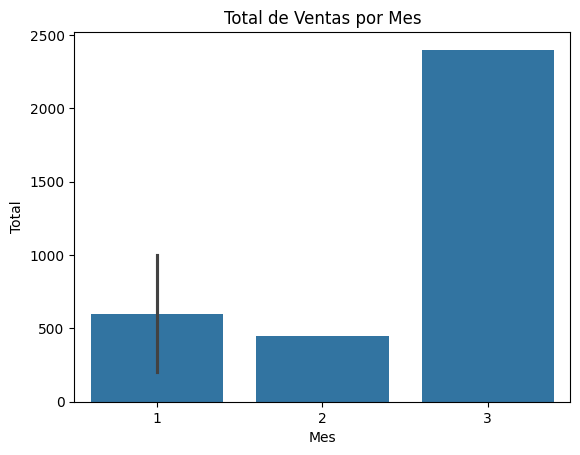

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de Total por Mes
sns.barplot(x="Mes", y="Total", data=data)
plt.title("Total de Ventas por Mes")
plt.show()


### <font color="blue">5.5.2 Gráfico de distribución geoespacial


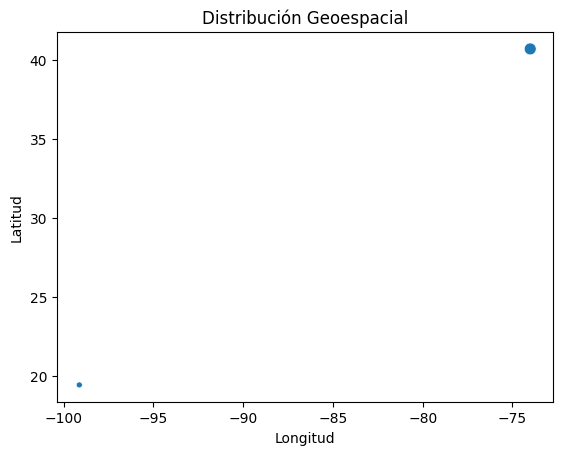

In [6]:
# Gráfico de puntos geográficos
sns.scatterplot(x="Longitud", y="Latitud", size="Distancia_km", data=data_geo, legend=False)
plt.title("Distribución Geoespacial")
plt.show()
